In [21]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import pandas as pd
import xgboost
from sklearn.metrics import accuracy_score

In [43]:
# simple function
def f(x):
    return (x[:, 0] * x[:, 1] + x[:, 2])>0 # x1*x2+x3>0
def f_noisy(x):
    return f(x + np.random.normal(0, 0.1))

In [16]:
np.random.seed(0)
x_data = np.random.randn(1000, 3) - 0.5
y_data = f(x_data)
X = pd.DataFrame(x_data, columns=['x1', 'x2', 'x3'])
X.head()

,x1,x2,x3
0,1.264052,-0.099843,0.478738
1,1.740893,1.367558,-1.477278
2,0.450088,-0.651357,-0.603219
3,-0.089401,-0.355956,0.954274
4,0.261038,-0.378325,-0.056137


In [17]:
true_count = np.count_nonzero(y_data)
false_count = len(y_data) - true_count

print("Number of True values:", true_count)
print("Number of False values:", false_count)


Number of True values: 390
Number of False values: 610


## SHAP explainer for f(x)

In [44]:
# Create an explainer for f(x)
explainer = shap.Explainer(f, x_data)
# Generate SHAP values for f(x)
shap_values = explainer(x_data)

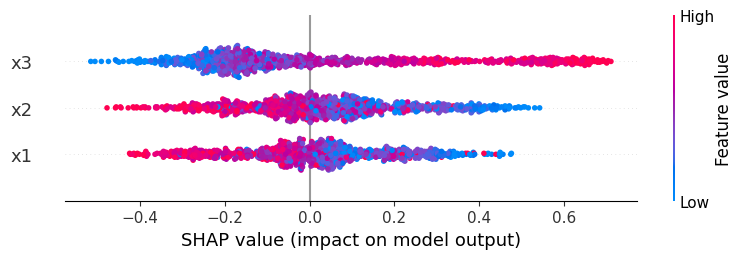

In [45]:
shap.summary_plot(shap_values, x_data, feature_names=['x1', 'x2', 'x3'])

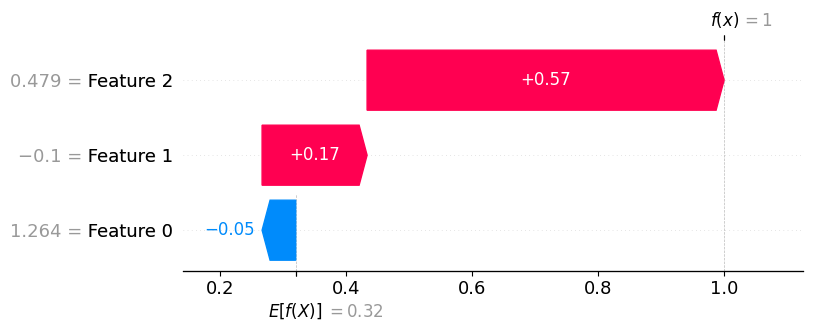

In [46]:
shap.waterfall_plot(shap_values[0])

## SHAP explainer for f_noisy(x)

In [48]:
y_pred = f_noisy(x_data)
accuracy = accuracy_score(y_data, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.941


In [49]:
# Create an explainer for f_noisy(x)
explainer = shap.Explainer(f_noisy, x_data)
# Generate SHAP values for f_noisy(x)
shap_values = explainer(x_data)

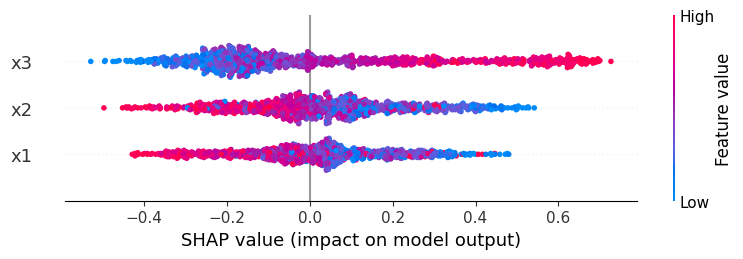

In [50]:
shap.summary_plot(shap_values, x_data, feature_names=['x1', 'x2', 'x3'])

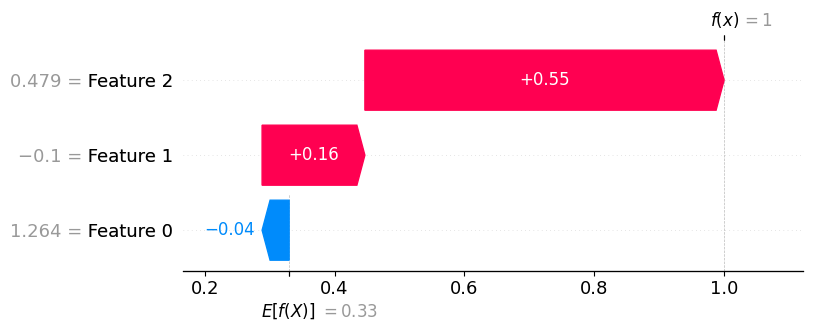

In [51]:
shap.waterfall_plot(shap_values[0])

## SHAP explainer for XGB

In [52]:
# create a simple XGBoost model
xgboost_model = xgboost.XGBClassifier(max_depth=2, n_estimators=10)
xgboost_model.fit(x_data, y_data)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
y_pred = xgboost_model.predict(x_data)
accuracy = accuracy_score(y_data, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.908


In [54]:
# Create an explainer for f(x)
explainer = shap.Explainer(xgboost_model, x_data)
# Generate SHAP values for f(x)
shap_values = explainer(x_data)

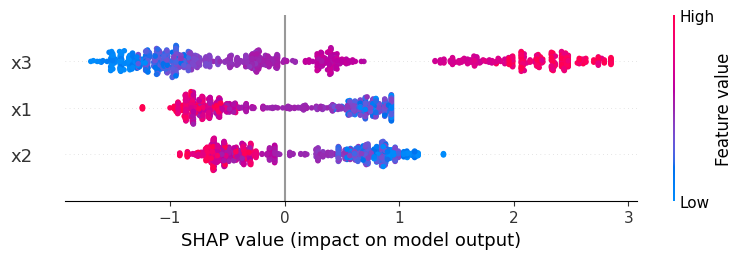

In [55]:
shap.summary_plot(shap_values, x_data, feature_names=['x1', 'x2', 'x3'])

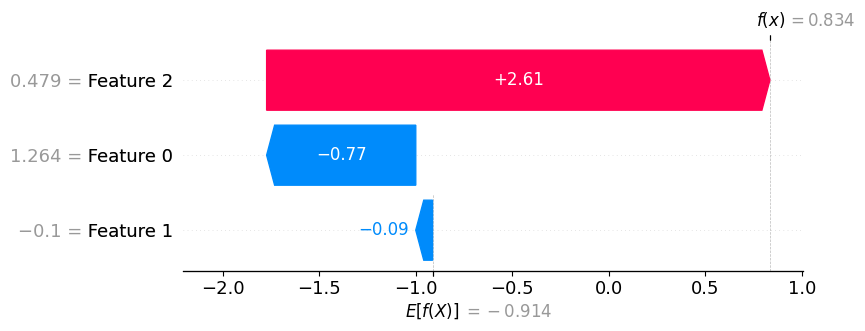

In [56]:
shap.waterfall_plot(shap_values[0])